In [147]:
from sympy import *
import numpy as np
import matplotlib.pyplot as plt
init_printing(use_unicode=True)
import fplot
%matplotlib inline

**Local Sensitivity Analysis** - It is a method to investigates the effect of small change in a parameter (input) of a model to its output (result). Mathematically this is:
$$
\frac{\frac{\Delta R}{R}}{\frac{\Delta P_i}{P_i}} = \frac{\Delta R}{\Delta P_i}\frac{P_i}{R}  
$$

Where $R$ is result or output, $P_i$ is parameter with subscript representing $i$-parameter. Since a small change in the parameter is to be considered, the limiting value can be considered, i,e, $\lim_{P_i\to 0}$. This makes the above equation an ODE, which for the right side is:
$$
\frac{d R}{dP_i}\frac{P_i}{R}  
$$

Solving the ODE and multiplying by factor $\frac{P_i}{R}$ provides the sensitivity of the model with respect to parameter $P_i$.

Below we perform the above operations for our fit-model (S-shaped)


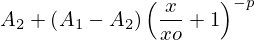

In [148]:
x,xo, A1, A2, p = symbols('x,xo, A1, A2, p')
eqn = A2+(A1-A2)/(1+x/xo)**p # this is our flux model
eqn

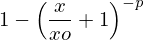

In [149]:
S_A2 = diff(eqn, A2) # we differentiate R (flux) wrt A2
S_A2

Now we need to choose fixed values for $x$, $x_o$ and $p$ and letting $P_i/R$ be the original value. Let $x = 10$, $x_o = 5$, $p = 0.967$ and let $P_i/R = 1/10$

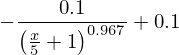

In [159]:
A2byR = 1/10        # this is Pi/R with Pi = A2 in this case. This is original value before any change. 
f_A2byR = (S_A2.subs([(xo, 5), (p, 0.967)]))*A2byR
# For analysis, I will let x be varable and Substituted x0 = 5 and p = 0.967. You can change this value and use
#other values. Here I am just making an example based on data you provided to me.

f_A2byR


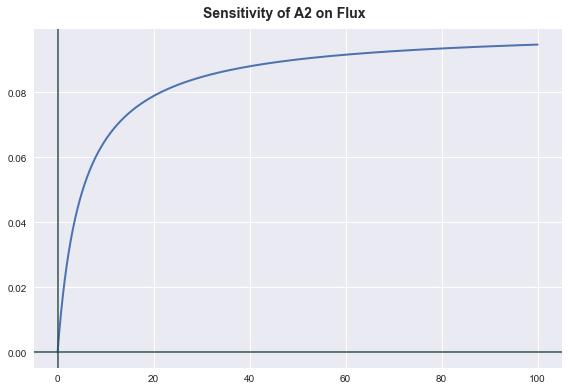

In [151]:
plot_fA2byR = lambdify(x, f_A2byR) 
fplot.plot(plot_fA2byR, 0, 100, title= 'Sensitivity of A2 on Flux', style=plt.style.use('seaborn'))

Next we do the same above exercise using other parameters. Let's say next we want to check with parameter $p$. Then first we get the differential $\frac{dR}{dP}$ and the product $\frac{dR}{dP}\times p/R$. Finally functional plots. 

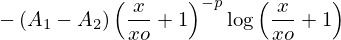

In [160]:
S_p = diff(eqn, p) # we differentiate R (flux) wrt p
S_p

Now you can assign different values for $A_1, A_2, x_o$ and $p$ and continue as done above.